
[図書データ](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset)

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data\bookcrossing-dataset\Book reviews\Book reviews\BX-Book-Ratings.csv
data\bookcrossing-dataset\Book reviews\Book reviews\BX-Users.csv
data\bookcrossing-dataset\Book reviews\Book reviews\BX_Books.csv
data\bookcrossing-dataset\Books Data with Category Language and Summary\Preprocessed_data.csv


In [25]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('data/bookcrossing-dataset/Book reviews/Book reviews/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('data/bookcrossing-dataset/Book reviews/Book reviews/BX_Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('data/bookcrossing-dataset/Book reviews/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

Dropping the header row

In [26]:
users.drop(users.index[0],inplace=True)
items.drop(items.index[0],inplace=True)
ratings.drop(ratings.index[0],inplace=True)

In [27]:
users.head()

,user_id,location,age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17
5,5,"farnborough, hants, united kingdom",NaN


In [28]:
items.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [29]:
ratings.head()

,user_id,isbn,rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3
5,276729,0521795028,6


Marge the three froms

In [30]:
df=pd.merge(users,ratings,on='user_id')
df=pd.merge(items,df,on='isbn')

In [31]:
df.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,user_id,location,age,rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",NaN,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",NaN,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",NaN,0


In [32]:
df.shape

(1031175, 12)

In [33]:
df.describe()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,user_id,location,age,rating
count,1031175,1031175,1031173,1031175,1031173,1031175,1031175,1031175,1031175,1031175,753330,1031175
unique,270170,241090,101592,116,16728,269861,269861,269861,92107,22480,141,11
top,0971880107,Wild Animus,Stephen King,2002,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,"toronto, ontario, canada",33,0
freq,2502,2502,10053,91801,34724,2502,2502,2502,11144,14782,32864,647323


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   isbn                 1031175 non-null  object
 1   book_title           1031175 non-null  object
 2   book_author          1031173 non-null  object
 3   year_of_publication  1031175 non-null  object
 4   publisher            1031173 non-null  object
 5   img_s                1031175 non-null  object
 6   img_m                1031175 non-null  object
 7   img_l                1031175 non-null  object
 8   user_id              1031175 non-null  object
 9   location             1031175 non-null  object
 10  age                  753330 non-null   object
 11  rating               1031175 non-null  object
dtypes: object(12)
memory usage: 94.4+ MB


Check for missing values.

In [35]:
df.isnull().sum()

isbn                        0
book_title                  0
book_author                 2
year_of_publication         0
publisher                   2
img_s                       0
img_m                       0
img_l                       0
user_id                     0
location                    0
age                    277845
rating                      0
dtype: int64

In [36]:
df.dropna(inplace=True)
df.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  0
img_m                  0
img_l                  0
user_id                0
location               0
age                    0
rating                 0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753326 entries, 0 to 1031174
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 753326 non-null  object
 1   book_title           753326 non-null  object
 2   book_author          753326 non-null  object
 3   year_of_publication  753326 non-null  object
 4   publisher            753326 non-null  object
 5   img_s                753326 non-null  object
 6   img_m                753326 non-null  object
 7   img_l                753326 non-null  object
 8   user_id              753326 non-null  object
 9   location             753326 non-null  object
 10  age                  753326 non-null  object
 11  rating               753326 non-null  object
dtypes: object(12)
memory usage: 74.7+ MB


Dropping the less informative columns.

In [38]:
df.drop(['isbn','img_s','img_m','img_l','user_id'],axis=1,inplace=True)
df.head()

,book_title,book_author,year_of_publication,publisher,location,age,rating
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"stockton, california, usa",18,0
2,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"ottawa, ontario, canada",49,0
5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"toronto, ontario, canada",30,8
6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"victoria, british columbia, canada",36,0
7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"ottawa, ontario, canada",29,0


In [39]:
df['age']=df['age'].astype(int)

location = df.location.str.split(', ', n=2, expand=True)

df['city'] = location[0]
df['state'] = location[1]
df['country'] = location[2]

In [40]:
df.drop('location',axis=1,inplace=True)
df.isnull().sum()

book_title                 0
book_author                0
year_of_publication        0
publisher                  0
age                        0
rating                     0
city                       0
state                      0
country                10635
dtype: int64

In [41]:
df.dropna(inplace=True)

Rating Distribution

Text(0.5, 1.0, 'Rating Distribution')

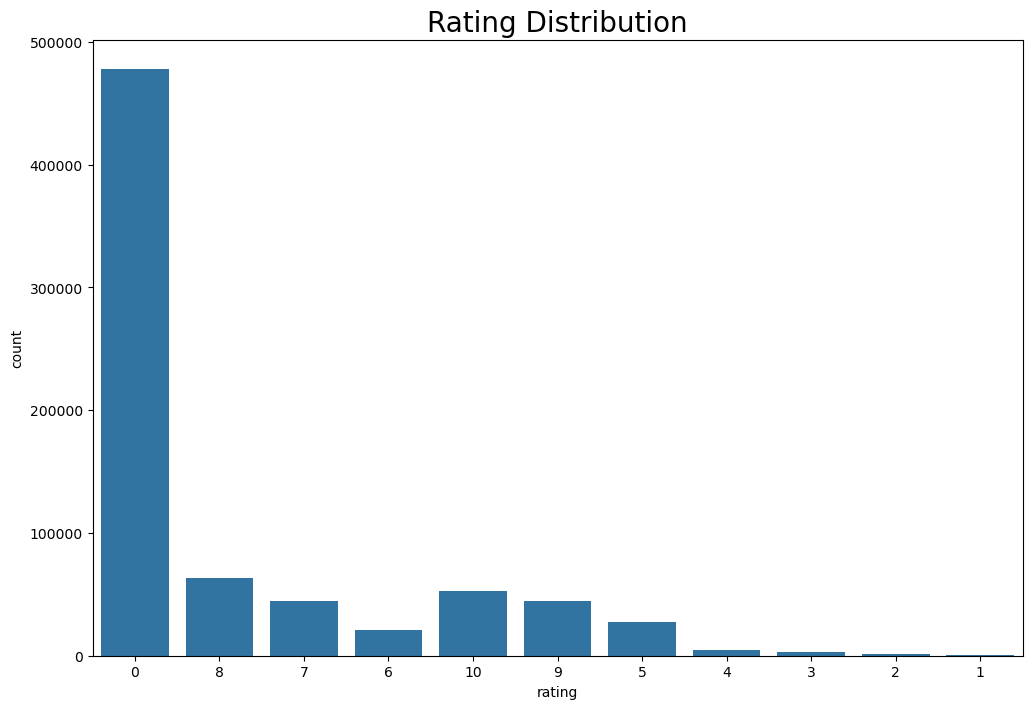

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df)
plt.title('Rating Distribution',size=20)

In [44]:
ds=df['year_of_publication'].value_counts().head(50).reset_index()
ds.columns=['year','count']
ds.head()

,year,count
0,2002,64890
1,2001,56455
2,2003,56414
3,1999,53223
4,2000,51269


Text(0.5, 1.0, 'Years of publishing')

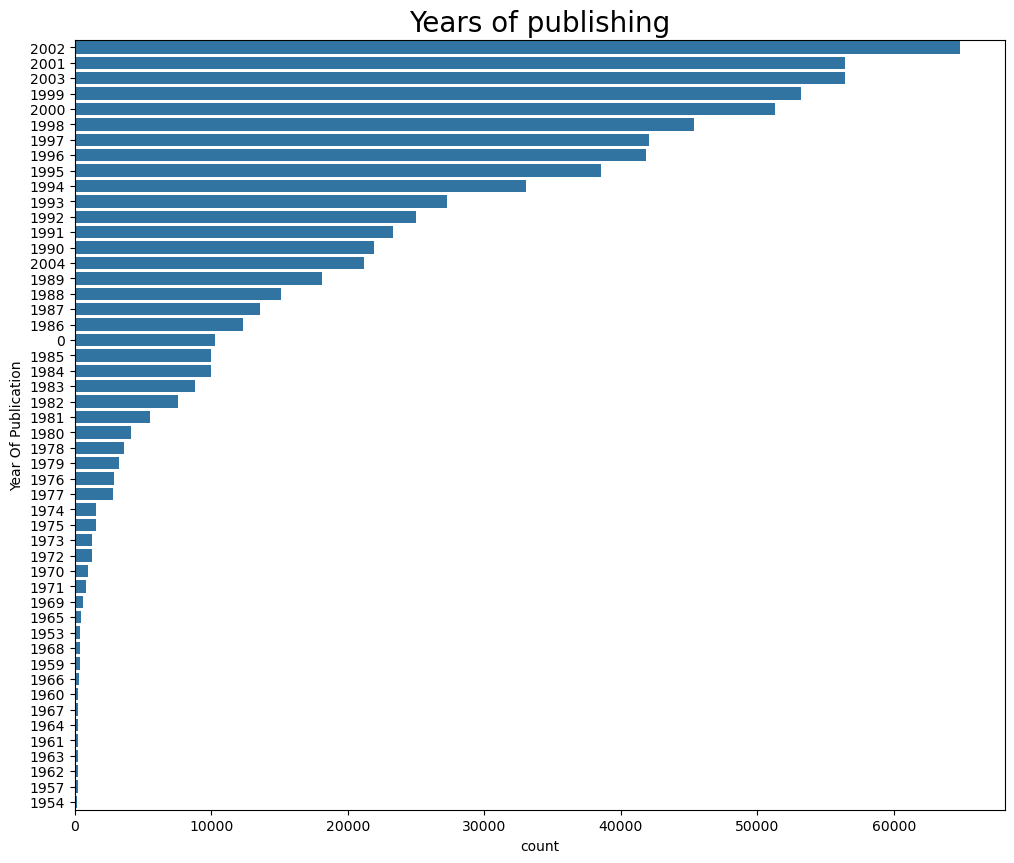

In [45]:
plt.figure(figsize=(12,10))
sns.barplot(x='count',y='year',data=ds)
plt.ylabel('Year Of Publication')
plt.title('Years of publishing',size=20)

In [46]:
ds=df['book_author'].value_counts().head(50).reset_index()
ds.columns=['author','count']
ds.head()

,author,count
0,Stephen King,7561
1,Nora Roberts,6298
2,John Grisham,4102
3,James Patterson,4021
4,Mary Higgins Clark,3319


Text(0.5, 1.0, 'Authors with most Ratings')

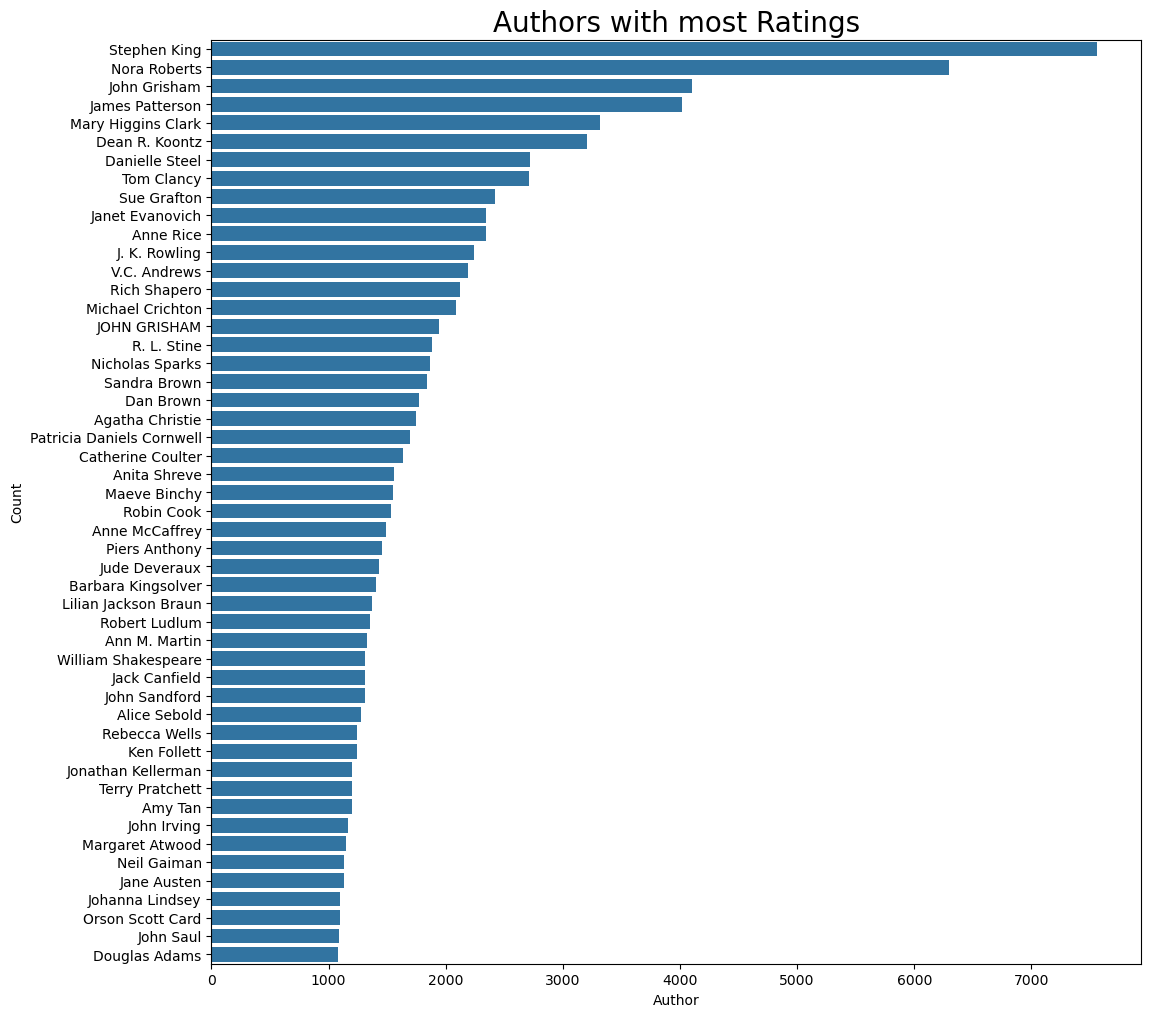

In [47]:
plt.figure(figsize=(12,12))
sns.barplot(x='count',y='author',data=ds)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Authors with most Ratings',size=20)

In [49]:
ds=df['book_title'].value_counts().head(50).reset_index()
ds.columns=['book','count']
ds.head()

,book,count
0,Wild Animus,2121
1,The Lovely Bones: A Novel,893
2,The Da Vinci Code,700
3,Bridget Jones's Diary,588
4,The Nanny Diaries: A Novel,562


Text(0.5, 1.0, 'Books with most Ratings')

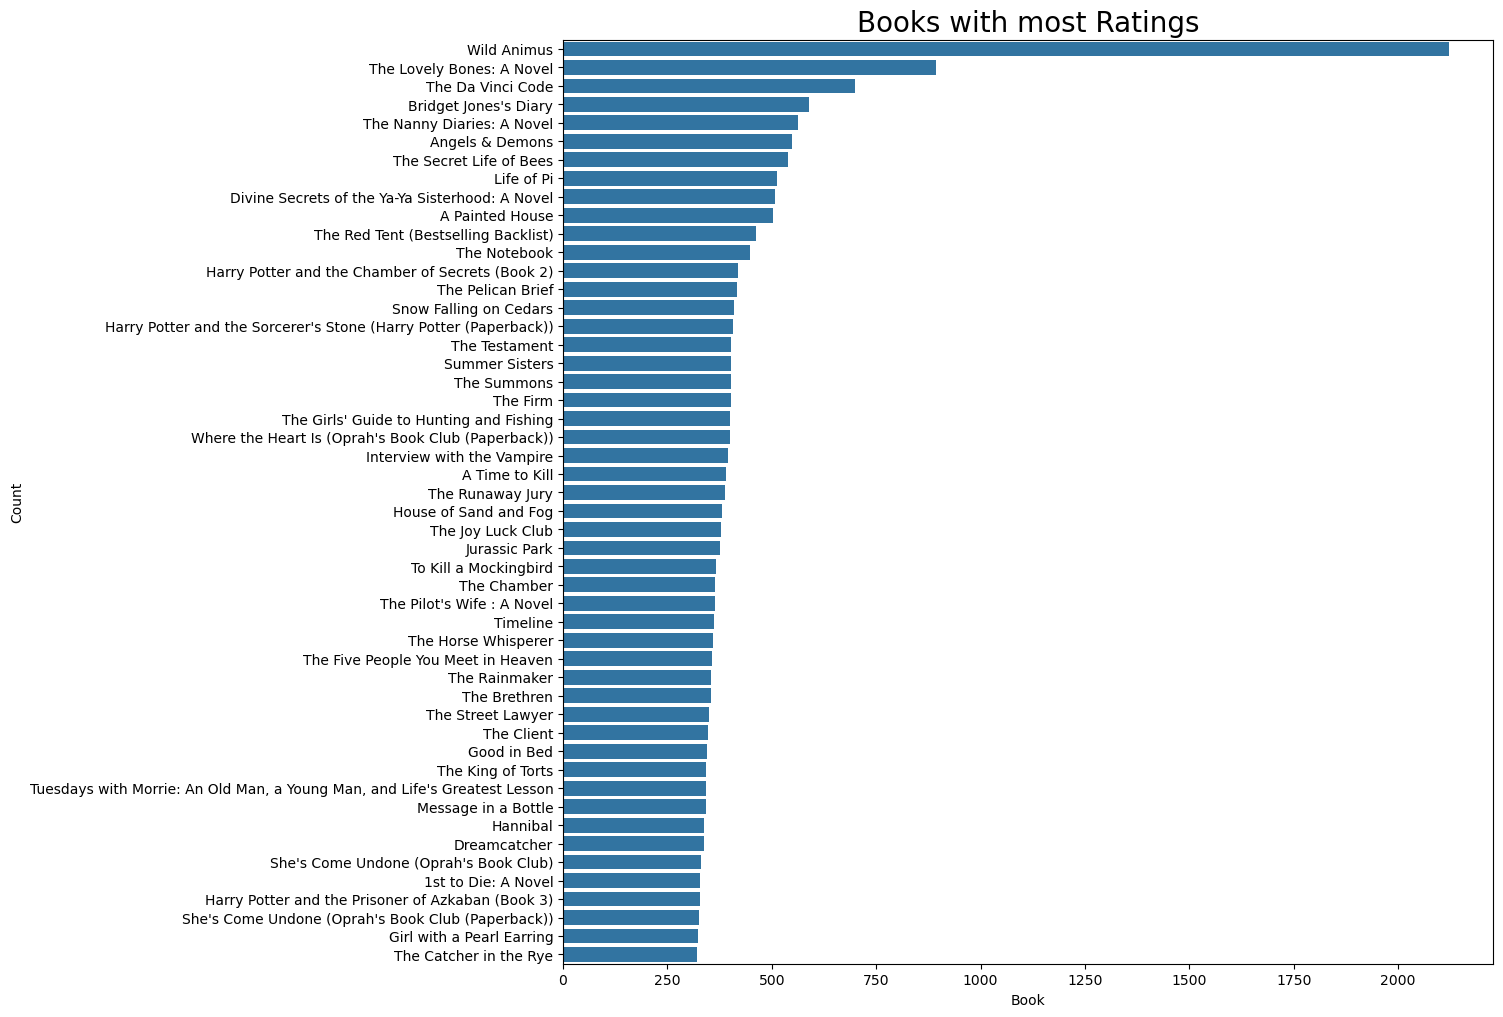

In [50]:
plt.figure(figsize=(12,12))
sns.barplot(x='count',y='book',data=ds)
plt.xlabel('Book')
plt.ylabel('Count')
plt.title('Books with most Ratings',size=20)